Capstone - Initial Models
Author:Ajai Shukla

Instructions

Create a new notebook for this assignment named Milestone02_studentname.ipynb (replacing studentname with your own).

    Split prepared data from Milestone 1 into training and testing
    Build a decision tree model that detects faulty products
    Build an ensemble model that detects faulty products
    Build an SVM model
    Evaluate all three models
    Describe your findings


Semi Conductor Manufacturing Data Set

The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1). This is a 1:14 proportion. In this work not only a feature selection method for extracting the post discriminative sensors is proposed, but also boosting and data generation techniques are devised to deal with highly imbalance between the pass and fail cases.


Importing basic Libraries
   

In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [94]:
# Load dataset
data = pd.read_csv(r"C:\Users\ashukla\Documents\DS\secom.csv")

print(data.shape)

(1567, 592)


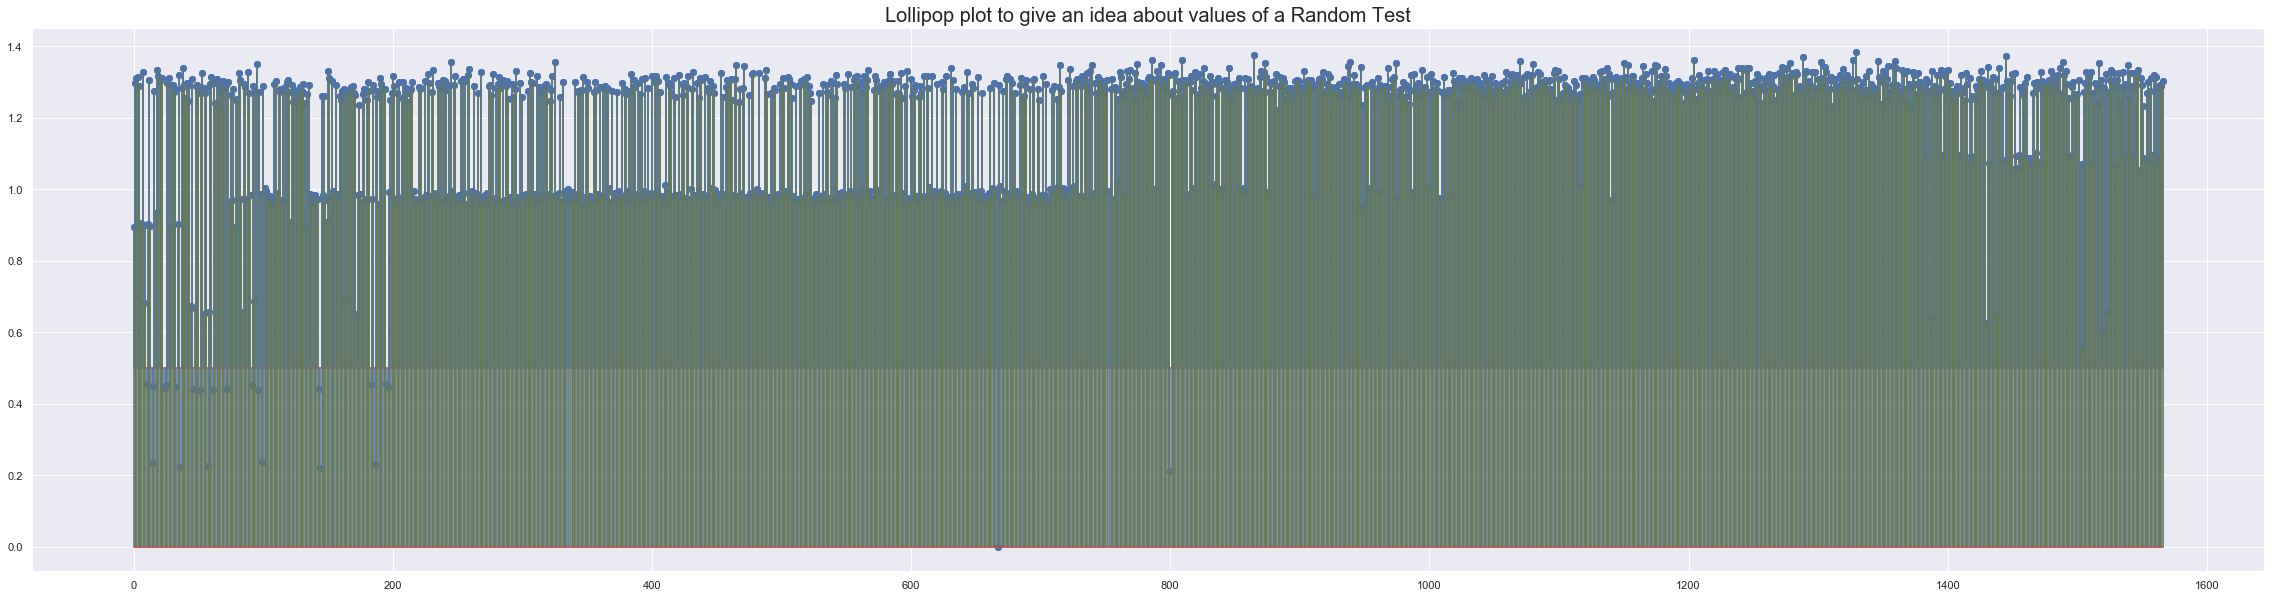

In [95]:
# create data
values = data['25']
 
plt.rcParams['figure.figsize'] = (40, 10)  
# position is customized with the bottom argument
plt.stem(values, markerfmt=' ', bottom=0.5)

# note that this works as well
plt.stem(values, basefmt=" ")
 
plt.title('Lollipop plot to give an idea about values of a Random Test', fontsize = 20)
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )  
plt.show()

# Exploratory Data Analysis

In [96]:
data.sample(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
909,2008-09-19 11:13:00,2954.92,2412.76,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.4418,...,80.9167,0.5028,0.0129,0.0035,2.5625,0.0118,0.0095,0.0027,80.9167,-1
1444,2008-09-10 15:56:00,2990.57,2534.66,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.6123,...,44.0961,0.5020,0.0117,0.0031,2.3308,0.0274,0.0121,0.0040,44.0961,-1
1319,2008-05-10 11:30:00,2912.24,2438.17,2203.1667,1312.9527,0.9448,100.0,96.3311,0.1227,1.4656,...,NaN,0.4956,0.0134,0.0033,2.7071,0.0382,0.0136,0.0044,35.5800,-1
1114,2008-09-26 20:23:00,2910.99,2533.39,2186.9000,936.4327,1.3493,100.0,104.3367,0.1206,1.3954,...,139.6209,0.4997,0.0140,0.0034,2.8070,0.0169,0.0236,0.0076,139.6209,-1
606,2008-08-31 10:59:00,2985.38,2542.34,2200.0666,1012.6747,1.3954,100.0,103.0644,0.1212,1.4791,...,NaN,0.5029,0.0152,0.0037,3.0171,0.0199,0.0159,0.0048,79.7752,-1


In [97]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [99]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [100]:
data.isnull().any().any()

True

In [101]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros

data = data.replace(np.NaN, 0)
data.isnull().any().any()

False

Data Visualization

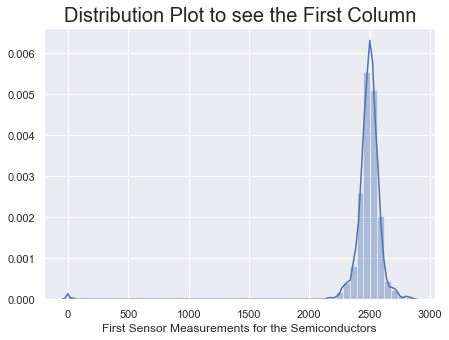

In [104]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

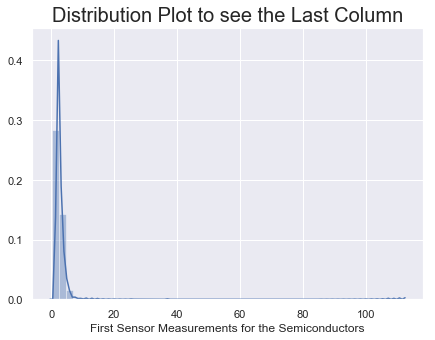

In [105]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['520'])
plt.title('Distribution Plot to see the Last Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

In [106]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

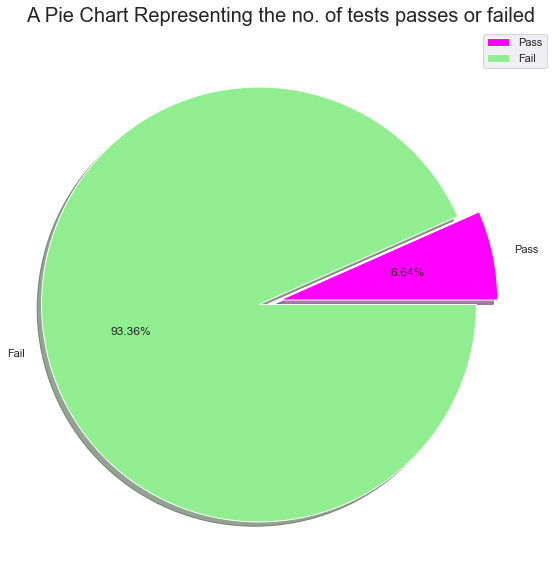

In [107]:
# pie chart

labels = ['Pass', 'Fail']
size = [104, 1463]
colors = ['magenta', 'lightgreen']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing the no. of tests passes or failed', fontsize = 20)
plt.legend()
plt.show()

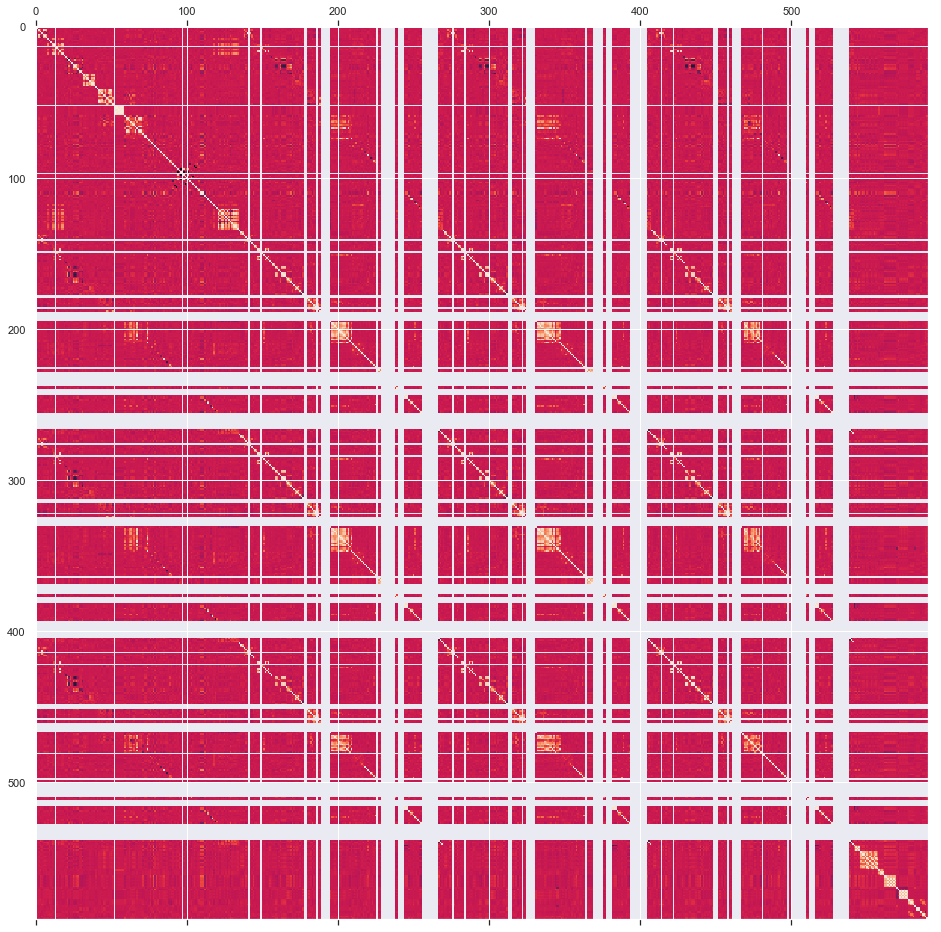

In [108]:
# matplot 

plt.rcParams['figure.figsize'] = (25, 25)
plt.matshow(data.corr())

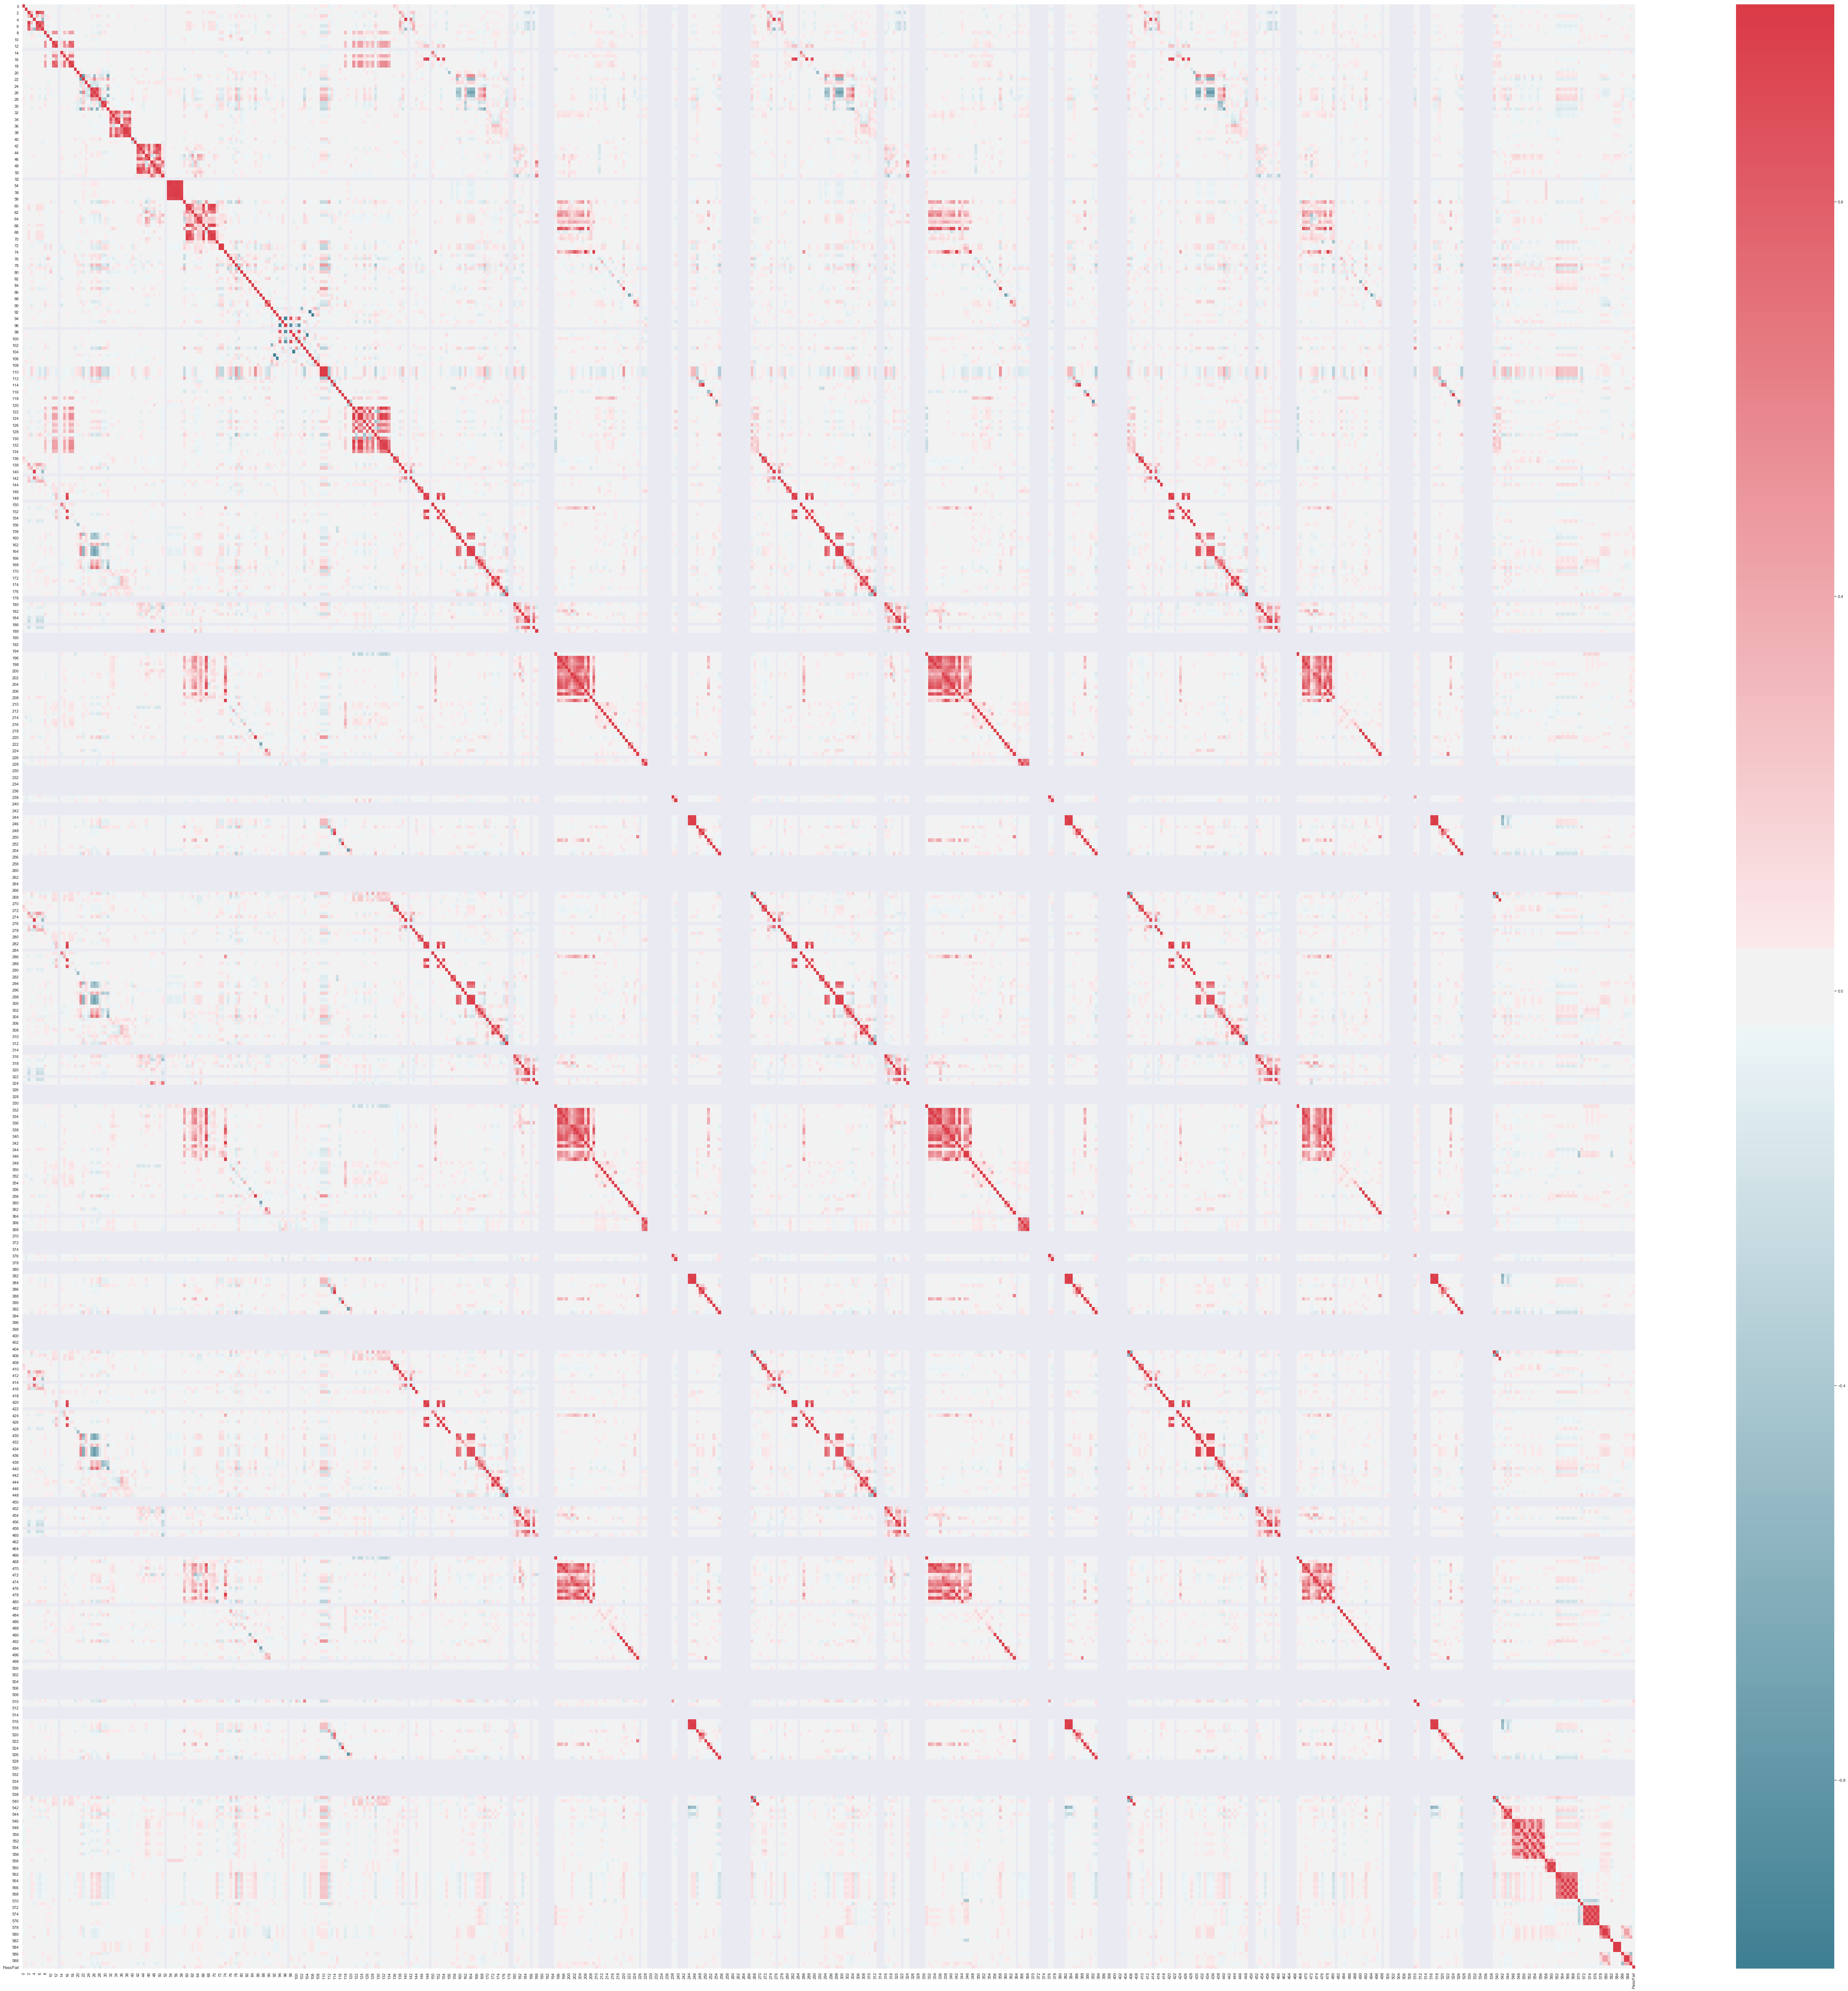

In [109]:
# Heatmap

fig, axis = plt.subplots(figsize = (100, 100))

corr = data.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), ax = axis)

Data Pre-processing

In [110]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [111]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


# splitting data into train and  test 

In [112]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [113]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Before Sampling

Modelling without PCA

# Build a decision tree model that detects faulty products

In [114]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.8853503184713376


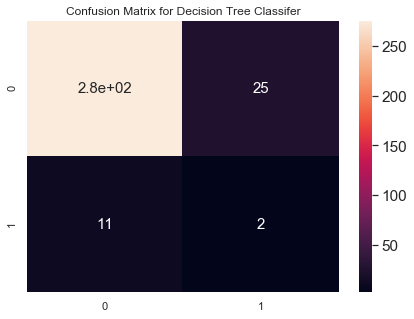

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [116]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


# Build an ensemble model that detects faulty products

In [117]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9920191540303273
Testing Accuarcy:  0.9617834394904459


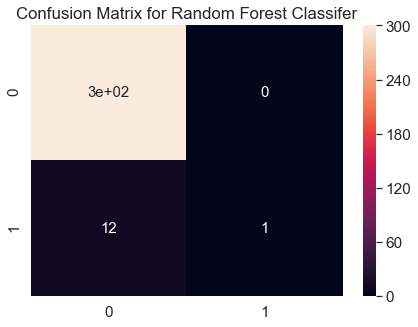

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Random Forest Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [119]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


# Build an SVM model

In [120]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Accuracy:  0.9329608938547486
Testing Accuarcy:  0.9585987261146497


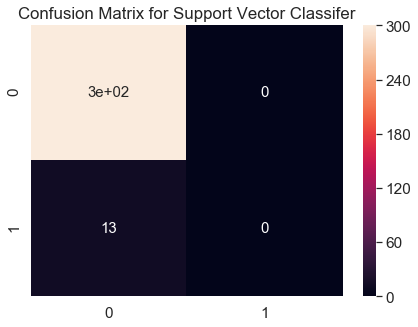

In [121]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Support Vector Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [122]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


Visualization of Classification v/s Anamoly Detection Accuracy

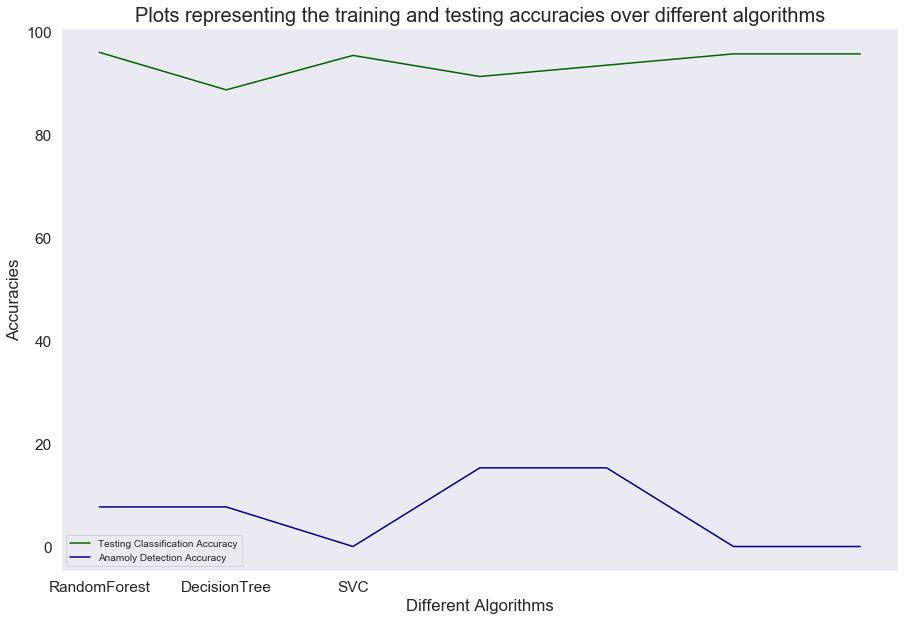

In [123]:
# plotting the train test results for all the 9 algorithms

test = [96.1, 88.8, 95.5, 91.4, 93.6, 95.8, 95.8]
anamoly = [7.7, 7.7, 0, 15.3, 15.3, 0, 0]

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Plots representing the training and testing accuracies over different algorithms', fontsize = 20)
plt.plot(range(0, 7), test, c = 'darkgreen', )
plt.plot(range(0, 7), anamoly, c = 'darkblue',)
plt.xlabel('Different Algorithms')
plt.ylabel('Accuracies')
labels = "Testing Classification Accuracy", "Anamoly Detection Accuracy" 

n_groups = 7
index = np.arange(n_groups)

plt.xticks(index, ('RandomForest', 'DecisionTree', 'SVC'))
plt.legend(labels, loc = 'best', fontsize = 10)
plt.show()

# After Sampling of the Dataset

Under-Sampling


In [128]:
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [129]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [130]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [131]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [132]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [133]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [134]:
# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [136]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.7142857142857143


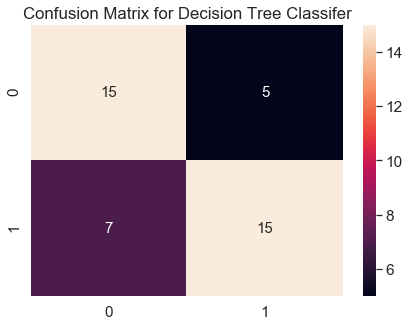

In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [139]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [140]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.68 %


In [143]:
!pip install funcsigs

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

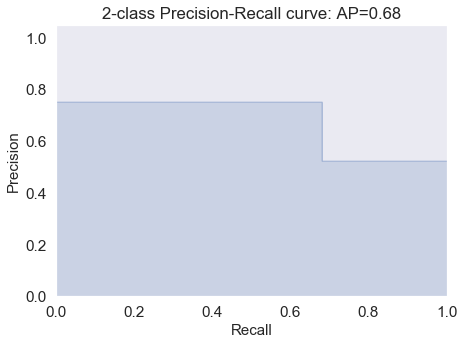

In [144]:
from sklearn.metrics import precision_recall_curve
from funcsigs  import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))

# ensemble model 

In [145]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9939759036144579
Testing Accuarcy:  0.6428571428571429


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


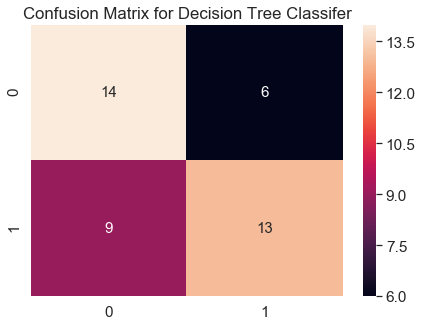

In [146]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [147]:
#Anamoly Detection Accuracy
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [148]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.62 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

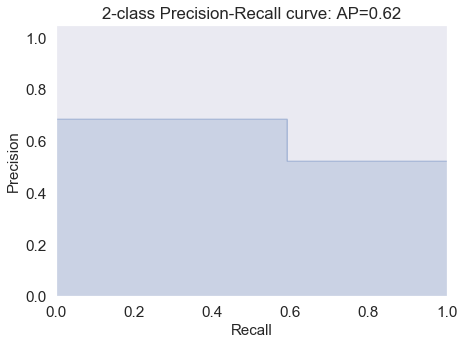

In [149]:
from sklearn.metrics import precision_recall_curve
from funcsigs  import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))

# Comparison of Results Obtained by Under Sampling

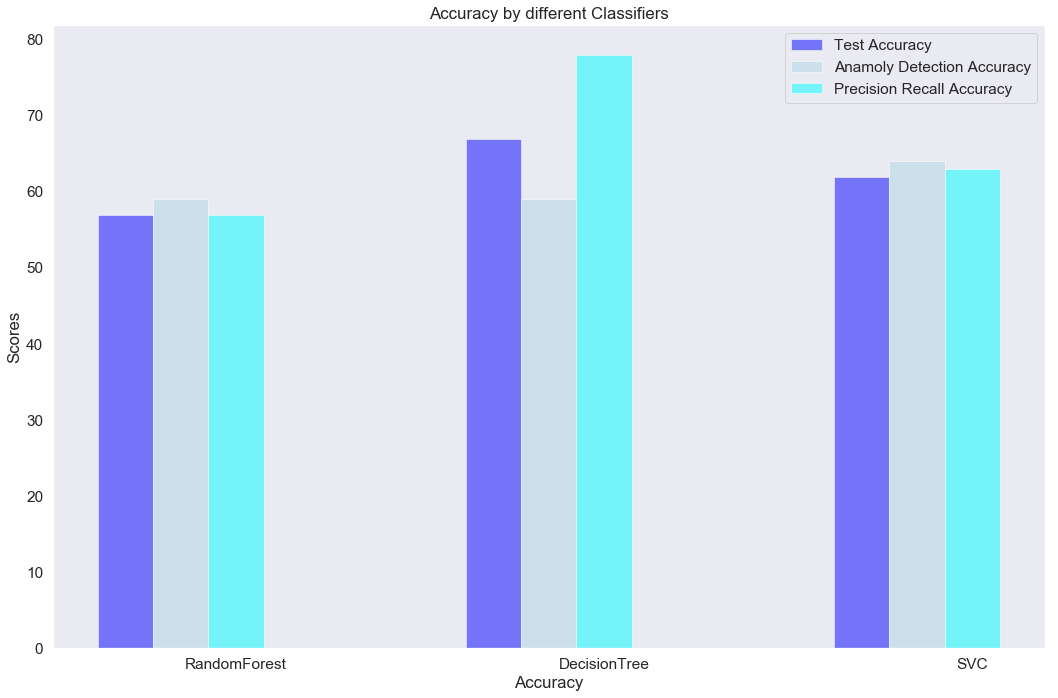

In [153]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
Test_Accuracy = (57, 67, 62 )
Anamoly_Detection_Accuracy = (59, 59, 64)
Precision_Recall_Accuracy = (57, 78, 63)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
 
rects1 = plt.bar(index, Test_Accuracy, bar_width, alpha = 0.5, color = 'blue', label = 'Test Accuracy')
rects2 = plt.bar(index + bar_width, Anamoly_Detection_Accuracy, bar_width, alpha = 0.5, color = 'lightblue', label = 'Anamoly Detection Accuracy')
rects3 = plt.bar(index + 2*bar_width, Precision_Recall_Accuracy, bar_width, alpha = 0.5 , color = 'cyan', label = 'Precision Recall Accuracy' )

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Accuracy')
plt.ylabel('Scores')
plt.title('Accuracy by different Classifiers')
plt.xticks(index + 2*bar_width, ('RandomForest', 'DecisionTree', 'SVC'))
plt.legend()
plt.tight_layout()
plt.show()

# SMOTE(Over-Sampling) to treat the Anamoly Detection

In [154]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\ashukla\anaconda3\lib\site-packages (0.5.0)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [155]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

Using TensorFlow backend.
C:\Users\ashukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ashukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ashukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ashukla\Anaconda3\lib\site-packages\tensorflow\python\framework\d

(224, 590)
(224,)


We can see that the sizes of the x_resample and y_resample are same now, It is done by over sampling which means the class which was very less in number that is the fail class has now produced some replicated results to increase the size and hence to iradicate the problem of biasedness over the dataset in the classes of fail and pass.

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [157]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
from sklearn.naive_bayes import GaussianNB

Training Accuracy:  1.0
Testing Accuracy:  0.7380952380952381


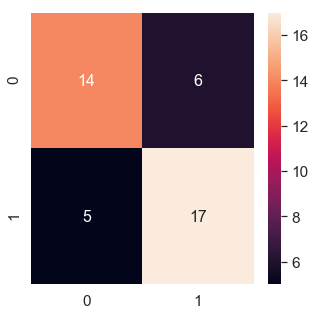

In [159]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [160]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(12/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  54.54545454545454 %


Ensemble Model:Random Forest Classifier

In [161]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9939759036144579
Testing Accuarcy:  0.6428571428571429


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


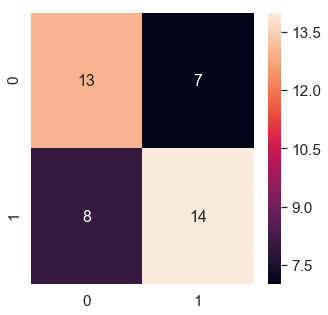

In [162]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [163]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


# Hyper Parameter Tuning for Support Vector Classifier

In [164]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.963855421686747
Testing Accuracy : 0.7619047619047619


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [165]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 0.1, 0.0001, 0.000001], 'kernel': ['linear', 'rbf'], 'gamma': [0.0000001, 0.0001, 0.001, 0.01]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)


grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameters :", best_parameters)

Best Accuracy:  0.572289156626506
Best Parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [167]:
from sklearn.svm import SVC

model  = SVC( C = 1, gamma = 0.001, kernel = 'rbf')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9096385542168675
Testing Accuracy : 0.7619047619047619


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


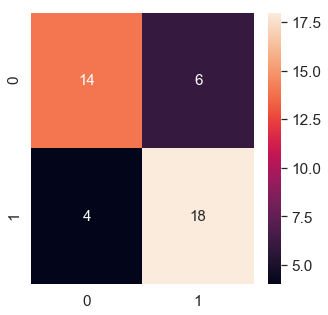

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [169]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.

Anamoly_accuracy = np.float(20/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  90.9090909090909 %


In [170]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.71 %


As, there is no increase in the value of testing accuracy, that means the SVC works good for the default values.

# Evaluate all three models

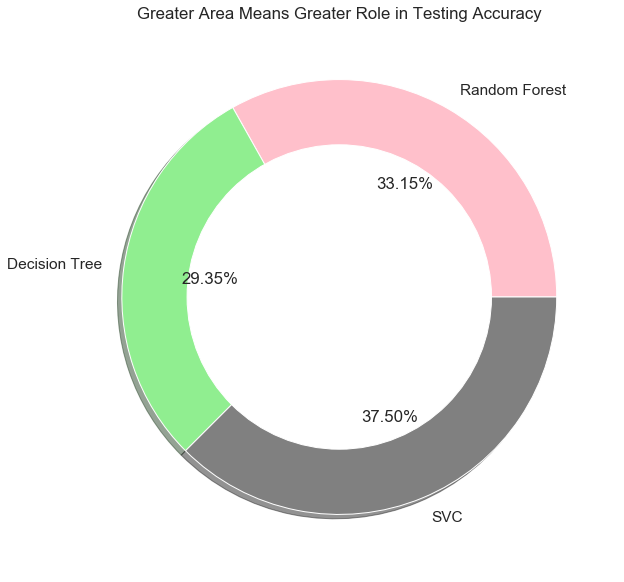

In [174]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "SVC"
size = [61, 54, 69]
colors = ['pink', 'lightgreen', 'grey']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Testing Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()


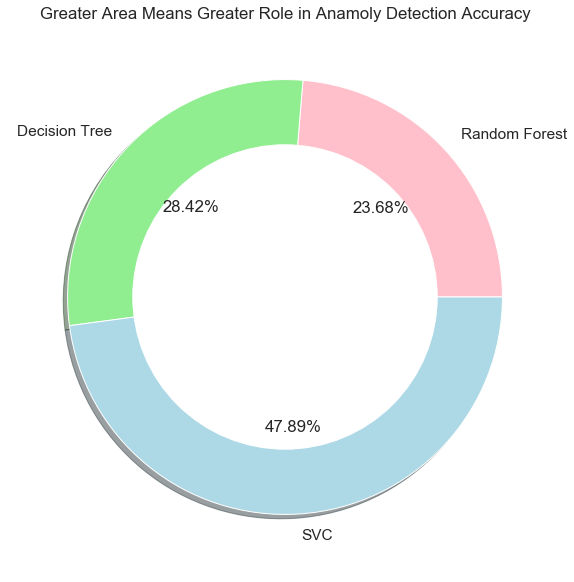

In [175]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "SVC"
size = [45, 54, 91]
colors = ['pink', 'lightgreen', 'lightblue']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Anamoly Detection Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [176]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[7.37610795e-02 5.89742410e-02 3.93648192e-02 3.16342863e-02
 2.77117436e-02 2.64318398e-02 2.45548080e-02 2.18411468e-02
 2.06673824e-02 1.99287893e-02 1.92776389e-02 1.89109632e-02
 1.86425113e-02 1.74786042e-02 1.73529549e-02 1.59917215e-02
 1.55954417e-02 1.54682997e-02 1.50387450e-02 1.42148397e-02
 1.40281045e-02 1.35896024e-02 1.30603650e-02 1.27085698e-02
 1.22026165e-02 1.16766373e-02 1.14593837e-02 1.11936089e-02
 1.09796231e-02 1.06434479e-02 1.02967672e-02 9.97821144e-03
 9.59715627e-03 9.24075029e-03 9.04249941e-03 8.73626497e-03
 8.58617533e-03 8.46621883e-03 8.20936090e-03 8.02139388e-03
 7.81494809e-03 7.71982065e-03 7.66000735e-03 7.31595566e-03
 7.15262022e-03 6.96826212e-03 6.66354557e-03 6.43379195e-03
 6.35283428e-03 6.27808381e-03 6.19312038e-03 5.82606941e-03
 5.75383760e-03 5.65535514e-03 5.40664707e-03 5.30785296e-03
 5.25154686e-03 5.07465867e-03 4.96221637e-03 4.82989870e-03
 4.78425925e-03 4.54998504e-03 4.36011482e-03 4.07994634e-03
 4.01877351e-03 3.993164

After Applying PCA we can clearly see that we can perform Principal Component Analysis (Dimensionality Reduction because all the 590 attributes are not contributing in a big way to the result hence we can undermine the attributes which are less responsible to reach to the result, it will be helpgul for reducing the complexity as the number of columns is very high.)

Modelling with Top 28 attributes or components

In [177]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(x_train)
#print(pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [178]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.963855421686747
Testing Accuracy : 0.7619047619047619


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [179]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.71 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.71')

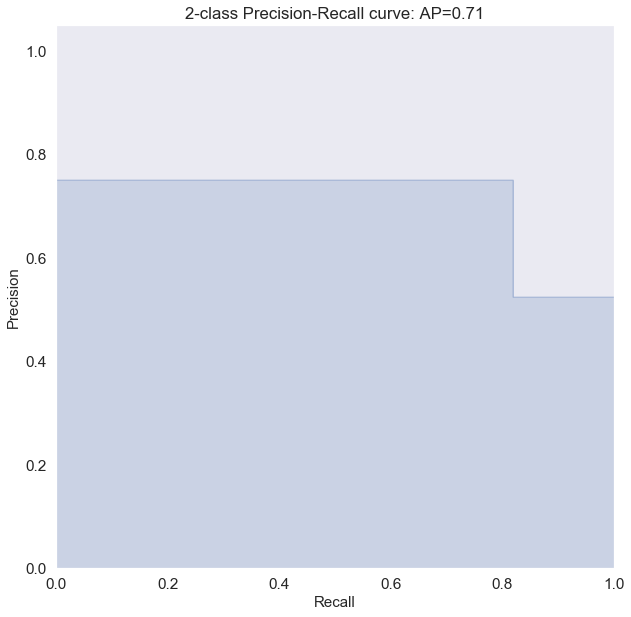

In [180]:
from sklearn.metrics import precision_recall_curve
from funcsigs  import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))

